In [1]:
from multinterp.unstructured.gaussian import GaussianProcessRegression
import math
import torch
import gpytorch
from matplotlib import pyplot as plt

%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
# Training data is 100 points in [0,1] inclusive regularly spaced
train_x = torch.linspace(0, 1, 100)
# True function is sin(2*pi*x) with Gaussian noise
train_y = torch.sin(train_x * (2 * math.pi)) + torch.randn(train_x.size()) * math.sqrt(
    0.04
)

In [3]:
interp = GaussianProcessRegression(train_y, train_x)

Iter 1/50 - Loss: 0.948   lengthscale: 0.693   noise: 0.693
Iter 2/50 - Loss: 0.917   lengthscale: 0.644   noise: 0.644
Iter 3/50 - Loss: 0.883   lengthscale: 0.598   noise: 0.598
Iter 4/50 - Loss: 0.845   lengthscale: 0.555   noise: 0.554
Iter 5/50 - Loss: 0.802   lengthscale: 0.514   noise: 0.513
Iter 6/50 - Loss: 0.754   lengthscale: 0.475   noise: 0.474
Iter 7/50 - Loss: 0.701   lengthscale: 0.439   noise: 0.437
Iter 8/50 - Loss: 0.648   lengthscale: 0.405   noise: 0.402
Iter 9/50 - Loss: 0.597   lengthscale: 0.372   noise: 0.369
Iter 10/50 - Loss: 0.551   lengthscale: 0.342   noise: 0.339
Iter 11/50 - Loss: 0.510   lengthscale: 0.315   noise: 0.310
Iter 12/50 - Loss: 0.472   lengthscale: 0.292   noise: 0.284
Iter 13/50 - Loss: 0.436   lengthscale: 0.272   noise: 0.259
Iter 14/50 - Loss: 0.401   lengthscale: 0.256   noise: 0.236
Iter 15/50 - Loss: 0.367   lengthscale: 0.242   noise: 0.215
Iter 16/50 - Loss: 0.333   lengthscale: 0.231   noise: 0.196
Iter 17/50 - Loss: 0.299   length

In [4]:
# Test points are regularly spaced along [0,1]
# Make predictions by feeding model through likelihood
with torch.no_grad(), gpytorch.settings.fast_pred_var():
    test_x = torch.linspace(0, 1, 51)
    observed_pred = interp._likelihood(interp._model(test_x))

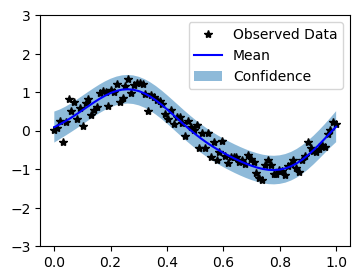

In [5]:
with torch.no_grad():
    # Initialize plot
    f, ax = plt.subplots(1, 1, figsize=(4, 3))

    # Get upper and lower confidence bounds
    lower, upper = observed_pred.confidence_region()
    # Plot training data as black stars
    ax.plot(train_x.numpy(), train_y.numpy(), "k*")
    # Plot predictive means as blue line
    ax.plot(test_x.numpy(), observed_pred.mean.numpy(), "b")
    # Shade between the lower and upper confidence bounds
    ax.fill_between(test_x.numpy(), lower.numpy(), upper.numpy(), alpha=0.5)
    ax.set_ylim([-3, 3])
    ax.legend(["Observed Data", "Mean", "Confidence"])